# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import numpy as np
from glob import glob

# from tqdm.notebook import tqdm as tqdm_notebook # newer version of tqdm use this
from tqdm import tqdm_notebook

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [3]:
human_files

array(['/data/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg',
       '/data/lfw/Alex_Corretja/Alex_Corretja_0001.jpg',
       '/data/lfw/Daniele_Bergamin/Daniele_Bergamin_0001.jpg', ...,
       '/data/lfw/Ferenc_Madl/Ferenc_Madl_0002.jpg',
       '/data/lfw/Jim_Flaherty/Jim_Flaherty_0001.jpg',
       '/data/lfw/Stacey_Yamaguchi/Stacey_Yamaguchi_0001.jpg'], 
      dtype='<U90')

12077
/data/lfw/Marilyn_Monroe/Marilyn_Monroe_0001.jpg
Number of faces detected: 1


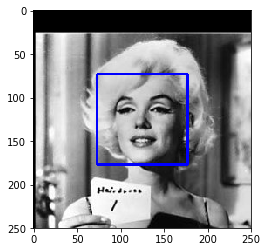

In [4]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
i = np.random.randint(0, len(human_files) )
img = cv2.imread(human_files[i])
print(i)
print(human_files[i])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [5]:
cv2.__version__

'3.3.1'

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [6]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [7]:
# from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.


In [8]:
result_human = []
[result_human.append(face_detector(human_files_short[i])) for i in tqdm_notebook(range(len(human_files_short)))];
# np.array(result_human).mean()
"{} % of the human faces are detected as human face.".format(np.array(result_human).mean()*100)

HBox(children=(IntProgress(value=0), HTML(value='')))

'98.0 % of the human faces are detected as human face.'

In [9]:
result_dog = []
[result_dog.append(face_detector(dog_files_short[i])) for i in tqdm_notebook(range(len(dog_files_short)))];
# np.array(result_dog).mean()
"{} % of the dog images are detected as human face.".format(np.array(result_dog).mean()*100)

HBox(children=(IntProgress(value=0), HTML(value='')))

'17.0 % of the dog images are detected as human face.'

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [11]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
print('Cuda is available: {}'.format(use_cuda))

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:17<00:00, 32174270.80it/s]


Cuda is available: True


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [12]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path

    image = Image.open(img_path)# .convert("RGB")
    # print(image)
    
    normalize = transforms.Normalize(mean = (0.5, 0.5, 0.5),
                                     std = (1, 1, 1))
    
    # resize image to 224x224 which is the VGG16 input size.
    transform_image = transforms.Compose([
        transforms.Resize(size=(256, 256)),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        normalize
    ])
    image_tensor = transform_image(image).unsqueeze(0) # [:3,:,:]
    # print(image_tensor.shape)
    
    ## Predict:
    if use_cuda:
        image_tensor = image_tensor.cuda()
    
    with torch.no_grad():
        output = VGG16(image_tensor)
        pred_image = torch.argmax(output).item()
    
    ## Return the *index* of the predicted class for that image
    
    
    return pred_image # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

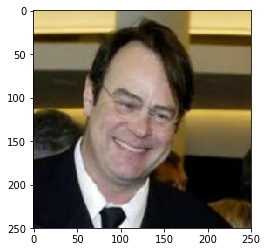

In [13]:
image = cv2.imread(human_files_short[0])
image = Image.open(human_files_short[0])
plt.imshow(image)

In [14]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred_image = VGG16_predict(img_path)
    is_dog = True if 151 <= pred_image <= 268 else False
    return is_dog # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [15]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
n_dogs_detected_in_humans = 0

for image in tqdm_notebook(human_files_short, desc='human files'):
    if dog_detector(image):
        n_dogs_detected_in_humans += 1
print("{} percent of human images are detected as dog image.".format(n_dogs_detected_in_humans))
        
        
n_dogs_detected_in_dogs = 0

for image in tqdm_notebook(dog_files_short, desc='dog files'):
    if dog_detector(image):
        n_dogs_detected_in_dogs += 1
print("{} percent of dog images are detected as dog image.".format(n_dogs_detected_in_dogs))

HBox(children=(IntProgress(value=0, description='human files: '), HTML(value='')))


0 percent of human images are detected as dog image.


HBox(children=(IntProgress(value=0, description='dog files: '), HTML(value='')))


99 percent of dog images are detected as dog image.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [16]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [17]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_folder = "/data/dog_images"

train_transform = transforms.Compose([
    transforms.Resize(size= 256),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(degrees = 20),
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.5, 0.5, 0.5],
                         std = [0.5, 0.5, 0.5])
    
])


val_test_transform = transforms.Compose([
    transforms.Resize(size= 256),
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.5, 0.5, 0.5],
                         std = [0.5, 0.5, 0.5])
    
])

train_data = datasets.ImageFolder(os.path.join(data_folder, 'train'), transform=train_transform)
val_data = datasets.ImageFolder(os.path.join(data_folder, 'valid'), transform=val_test_transform)
test_data = datasets.ImageFolder(os.path.join(data_folder, 'test'), transform=val_test_transform)

In [18]:
batch_size= 64

In [19]:
loader_train_data = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=0)
loader_val_data = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=0)
loader_test_data = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=0)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

**The train dataset transformations in the order applied:**
- Image has been resized to 256 by 256
- Data augmentation through flipping and rotation is performed to reflect different positions and angles possible in real life 
    - Horizontal flip with a probability of 0.3 is applied
    - Vertical flip with a probability of 0.2 is applied
    - Random rotation of 20 degrees is applied 
- The image of 256x256 has been cropped to take the center 224 by 224 smaller image
- The image has been converted to pytorch tensor format
- The tensor has been normalized


**The test dataset transformations in the order applied:**
- Image has been resized to 256 by 256
- The image of 256x256 has been cropped to take the center 224 by 224 smaller image
- The image has been converted to pytorch tensor format
- The tensor has been normalized

The input tensor size is chosen to be 224x224 because this is the input size for VGG16 model.  
Data augmentation is only applied to train data and not the validation or test data. Because during validation and testing we want to measure the performance of the model and assess how much it learned during training. We need to keep these sets the same such that the performance can be reliably measured over time, and also over different models trained. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [20]:
import torch.nn as nn
import torch.nn.functional as F

In [21]:
7*7*1024

50176

In [22]:
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # conv1 sees 224x224x3 image
        # convolutional layer icnreases the depth
        # the pool layer decreases the width x heigth
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        
        # conv2 sees 112x112x64
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        
        # conv3 sees 56x56x128
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        
        # conv4 sees 28x28x256
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        
        # conv5 sees 14x14x512
        self.conv5 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
        
        # conv5 sees 7x7x1024
        # Don't apply max pooling after conv6
        self.conv6 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1)
        
        # Max pool layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # fully connected 1 sees 7x7x1024
        self.conv_output_size = 7*7*1024
        
        self.fc1 = nn.Linear(self.conv_output_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 133)
        
        # Dropout layer
        self.dropout = nn.Dropout(p=0.5)
        
    
    def forward(self, x):
        ## Define forward behavior
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool(x)
               
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool(x)
               
        x = self.conv5(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv6(x)
        x = F.relu(x)
#         x = self.pool(x)
        
        x = x.view(-1, self.conv_output_size)
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.fc3(x)        
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
use_cuda = torch.cuda.is_available()
print("cuda is available: {}".format(use_cuda))
if use_cuda:
    model_scratch.cuda()
    
print(model_scratch)

cuda is available: True
Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.5)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

- The CNN architecture has 6 convolutional layers followed by 3 fully connected layers.
- The Convolutional layers each have a convolution followed by ReLU activation and finally a max pooling applied.
- The depth of the images have been increased at each convolutional layer from 3 to 64 - 128 - 256 - 512 - 1024 layers.
- The 6th convolution layer keeps the depth at 2014 layers and the Max pooling is not applied after this layer.

- The fully connected section of the architecture has an input shape of 7x7x1024 and has 3 layers.
- The fully connected layer has a flow of: 7x7x1024 = 50176 -> 1024 -> 512 -> 133.
- The ReLU activation fucntion is applied after connected layers 1 and 2, followed by dropout with a probability of 0.5
- The final layer is the output layer and no activation nor droput is applied at this layer. 
- The output layer has 133 output nodes corresponding to each breed of dogs.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [23]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr= 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [24]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in tqdm_notebook(range(1, n_epochs+1), desc='Num epoch: '):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in tqdm_notebook(enumerate(loaders['train']), desc='Training batch: ', total=len(loaders['train'])):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear gradients
            optimizer.zero_grad()
            
            # forward pass
            output = model(data)
            
            # calculate batch loss
            loss = criterion(output, target)
            
            # backward pass
            loss.backward()
            
            # Perform gradient descent
            optimizer.step()
            
            # Update avergae traning loss
            train_loss += (1/ (batch_idx + 1)) * (loss.data - train_loss)
            
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        correct=0
        total=0
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            
            valid_loss += (1/ (batch_idx+1)) * (loss.data - valid_loss)
            
            
            # To calculate accuracy:
            # convert output probabilities to predicted class
            output = F.softmax(output, dim=1)
            pred = output.data.max(1, keepdim=True)[1]

            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)
    

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        # print validation accuracy
        print('\nValidation Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). The model is saved...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [25]:
# define loaders
loaders_scratch = {'train': loader_train_data,
                   'valid': loader_val_data,
                   'test': loader_test_data}

In [26]:
# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

HBox(children=(IntProgress(value=0, description='Num epoch: : ', max=20), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 1 	Training Loss: 4.859215 	Validation Loss: 4.747306

Validation Accuracy:  1% (16/835)
Validation loss decreased (inf --> 4.747306). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 2 	Training Loss: 4.699445 	Validation Loss: 4.589680

Validation Accuracy:  1% (10/835)
Validation loss decreased (4.747306 --> 4.589680). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 3 	Training Loss: 4.588225 	Validation Loss: 4.564770

Validation Accuracy:  2% (21/835)
Validation loss decreased (4.589680 --> 4.564770). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 4 	Training Loss: 4.516457 	Validation Loss: 4.469904

Validation Accuracy:  2% (23/835)
Validation loss decreased (4.564770 --> 4.469904). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 5 	Training Loss: 4.453625 	Validation Loss: 4.381484

Validation Accuracy:  4% (37/835)
Validation loss decreased (4.469904 --> 4.381484). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 6 	Training Loss: 4.364660 	Validation Loss: 4.301566

Validation Accuracy:  5% (47/835)
Validation loss decreased (4.381484 --> 4.301566). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 7 	Training Loss: 4.303503 	Validation Loss: 4.247374

Validation Accuracy:  4% (38/835)
Validation loss decreased (4.301566 --> 4.247374). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 8 	Training Loss: 4.219189 	Validation Loss: 4.182885

Validation Accuracy:  5% (46/835)
Validation loss decreased (4.247374 --> 4.182885). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 9 	Training Loss: 4.123248 	Validation Loss: 4.083455

Validation Accuracy:  5% (48/835)
Validation loss decreased (4.182885 --> 4.083455). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 10 	Training Loss: 4.082687 	Validation Loss: 4.030811

Validation Accuracy:  6% (53/835)
Validation loss decreased (4.083455 --> 4.030811). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 11 	Training Loss: 4.008281 	Validation Loss: 4.005800

Validation Accuracy:  7% (62/835)
Validation loss decreased (4.030811 --> 4.005800). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 12 	Training Loss: 3.935461 	Validation Loss: 3.936207

Validation Accuracy:  7% (62/835)
Validation loss decreased (4.005800 --> 3.936207). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 13 	Training Loss: 3.887115 	Validation Loss: 3.847222

Validation Accuracy:  9% (76/835)
Validation loss decreased (3.936207 --> 3.847222). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 14 	Training Loss: 3.800330 	Validation Loss: 3.770421

Validation Accuracy: 10% (90/835)
Validation loss decreased (3.847222 --> 3.770421). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 15 	Training Loss: 3.757113 	Validation Loss: 3.791767

Validation Accuracy: 10% (90/835)


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 16 	Training Loss: 3.698423 	Validation Loss: 3.825765

Validation Accuracy: 10% (90/835)


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 17 	Training Loss: 3.617751 	Validation Loss: 3.561347

Validation Accuracy: 11% (95/835)
Validation loss decreased (3.770421 --> 3.561347). The model is saved...


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 18 	Training Loss: 3.563839 	Validation Loss: 3.568219

Validation Accuracy: 14% (118/835)


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 19 	Training Loss: 3.485075 	Validation Loss: 3.591958

Validation Accuracy: 12% (104/835)


HBox(children=(IntProgress(value=0, description='Training batch: : ', max=105), HTML(value='')))

Epoch: 20 	Training Loss: 3.408049 	Validation Loss: 3.450968

Validation Accuracy: 15% (131/835)
Validation loss decreased (3.561347 --> 3.450968). The model is saved...



In [27]:
print(torch.__version__)

0.4.0


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [28]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
# model_scratch = torch.load('model_scratch.pt')
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.500770


Test Accuracy: 15% (129/836)


In [29]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in tqdm_notebook(enumerate(loaders['test']), desc='test', total = len(loaders['test'])):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [30]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

HBox(children=(IntProgress(value=0, description='test: ', max=14), HTML(value='')))


Test Loss: 3.519753


Test Accuracy: 15% (129/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [31]:
## TODO: Specify data loaders
# Use previous data loaders

import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_folder = "/data/dog_images"

train_transform = transforms.Compose([
    transforms.Resize(size= 256),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(degrees = 20),
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.5, 0.5, 0.5],
                         std = [0.5, 0.5, 0.5])
    
])


val_test_transform = transforms.Compose([
    transforms.Resize(size= 256),
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.5, 0.5, 0.5],
                         std = [0.5, 0.5, 0.5])
    
])

train_data = datasets.ImageFolder(os.path.join(data_folder, 'train'), transform=train_transform)
val_data = datasets.ImageFolder(os.path.join(data_folder, 'valid'), transform=val_test_transform)
test_data = datasets.ImageFolder(os.path.join(data_folder, 'test'), transform=val_test_transform)

batch_size = 64

loader_train_data = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=0)
loader_val_data = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=0)
loader_test_data = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=0)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [32]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# download VGG16 pretrained model
model_transfer = models.vgg16(pretrained=True)

# Freeze parameters of the model to avoid brackpropagation
for param in model_transfer.parameters():
    param.requires_grad = False

# get the number of dog classes from the train_dataset
number_of_dog_classes = len(train_data.classes)
    
# Define dog breed classifier part of model_transfer
classifier = nn.Sequential(nn.Linear(25088, 4096),
                           nn.ReLU(),
                           nn.Dropout(0.5),
                           nn.Linear(4096, 1024),
                           nn.ReLU(),
                           nn.Dropout(0.5),
                           nn.Linear(1024, 512),
                           nn.ReLU(),
                           nn.Dropout(0.5),
                           nn.Linear(512, number_of_dog_classes))

# Rplace the original classifier with the dog breed classifier from above
model_transfer.classifier = classifier

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


- VGG16 is used as the main architecture for this problem because it has proven itself as a veryviable model in image detection and classification.
- The convolutional layers are taken as-is, and only the fully connected layers have been modified and trained.
- The ReLU activation fucntion followed by droput has been applied to each fully connected layer.
- The input to the 1st fully connected layer has 25088 nodes which is reduced to 4096 nodes. 
- The 2nd fully connected layer has 512 nodes, and the final layer has 133 output nodes.
- Within 25 epochs this CNN architecture has achieved around 66% accuracy.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [33]:

criterion_transfer = nn.CrossEntropyLoss()

# Apply the gradient descent only on the classifier section of the NN architecture. only train the classifier! -> model_transfer.classifier.parameters()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [34]:
# train the model
# model_transfer = # train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))



def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):

    valid_loss_min = np.Inf
    
    print(f"Batch Size: {loaders['train'].batch_size}\n")
    
    for epoch in tqdm_notebook(range(1, n_epochs+1)):
        train_loss = 0.0
        valid_loss = 0.0
        
        # train the model
        model.train()
        for batch_idx, (data, target) in tqdm_notebook(enumerate(loaders['train']), desc='train', total=len(loaders['train'])):
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
#             if (batch_idx + 1) % 5 == 0:
#                 print(f'Epoch:{epoch}/{n_epochs} \tBatch:{batch_idx + 1}')
#                 print(f'Train Loss: {train_loss}\n')

        # validate the model
        model.eval()
        correct =0 
        total =0
        for batch_idx, (data, target) in tqdm_notebook(enumerate(loaders['valid']), desc='validation',  total=len(loaders['valid'])):
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
          
            # To calculate accuracy:
            # convert output probabilities to predicted class
            output = F.softmax(output, dim=1)
            pred = output.data.max(1, keepdim=True)[1]

            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)
    
           
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        # print validation accuracy
        print('\nValidation Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))
        
        # save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model



In [35]:
# define loaders_transfer
loaders_transfer = {'train': loader_train_data,
                    'valid': loader_val_data,
                    'test': loader_test_data}

In [36]:
model_transfer = train(25, loaders_transfer, model_transfer, optimizer_transfer,
                       criterion_transfer, use_cuda, 'model_transfer.pt')



Batch Size: 64



HBox(children=(IntProgress(value=0, max=25), HTML(value='')))

HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 1 	Training Loss: 4.673507 	Validation Loss: 3.223165

Validation Accuracy: 18% (158/835)
Validation loss decreased (inf --> 3.223165). Saving model...


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 2 	Training Loss: 3.558119 	Validation Loss: 2.318303

Validation Accuracy: 37% (316/835)
Validation loss decreased (3.223165 --> 2.318303). Saving model...


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 3 	Training Loss: 3.035712 	Validation Loss: 1.970233

Validation Accuracy: 45% (379/835)
Validation loss decreased (2.318303 --> 1.970233). Saving model...


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 4 	Training Loss: 2.816112 	Validation Loss: 1.619891

Validation Accuracy: 53% (449/835)
Validation loss decreased (1.970233 --> 1.619891). Saving model...


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 5 	Training Loss: 2.567639 	Validation Loss: 1.601559

Validation Accuracy: 50% (421/835)
Validation loss decreased (1.619891 --> 1.601559). Saving model...


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 6 	Training Loss: 2.507397 	Validation Loss: 1.345035

Validation Accuracy: 59% (494/835)
Validation loss decreased (1.601559 --> 1.345035). Saving model...


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 7 	Training Loss: 2.405001 	Validation Loss: 1.315513

Validation Accuracy: 58% (491/835)
Validation loss decreased (1.345035 --> 1.315513). Saving model...


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 8 	Training Loss: 2.324681 	Validation Loss: 1.338601

Validation Accuracy: 61% (516/835)


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 9 	Training Loss: 2.311189 	Validation Loss: 1.307483

Validation Accuracy: 60% (506/835)
Validation loss decreased (1.315513 --> 1.307483). Saving model...


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 10 	Training Loss: 2.265001 	Validation Loss: 1.170844

Validation Accuracy: 60% (509/835)
Validation loss decreased (1.307483 --> 1.170844). Saving model...


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 11 	Training Loss: 2.254675 	Validation Loss: 1.268770

Validation Accuracy: 62% (522/835)


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 12 	Training Loss: 2.223962 	Validation Loss: 1.300006

Validation Accuracy: 63% (533/835)


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 13 	Training Loss: 2.151206 	Validation Loss: 1.186642

Validation Accuracy: 65% (544/835)


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 14 	Training Loss: 2.126713 	Validation Loss: 1.136483

Validation Accuracy: 64% (535/835)
Validation loss decreased (1.170844 --> 1.136483). Saving model...


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 15 	Training Loss: 2.092266 	Validation Loss: 1.194642

Validation Accuracy: 65% (549/835)


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 16 	Training Loss: 2.128229 	Validation Loss: 1.138531

Validation Accuracy: 65% (546/835)


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 17 	Training Loss: 2.072109 	Validation Loss: 1.141035

Validation Accuracy: 65% (543/835)


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 18 	Training Loss: 2.045445 	Validation Loss: 1.074538

Validation Accuracy: 64% (536/835)
Validation loss decreased (1.136483 --> 1.074538). Saving model...


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 19 	Training Loss: 2.121817 	Validation Loss: 1.177906

Validation Accuracy: 63% (529/835)


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 20 	Training Loss: 2.071385 	Validation Loss: 1.204437

Validation Accuracy: 64% (541/835)


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 21 	Training Loss: 2.059146 	Validation Loss: 1.159689

Validation Accuracy: 65% (544/835)


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 22 	Training Loss: 2.023379 	Validation Loss: 1.059120

Validation Accuracy: 65% (550/835)
Validation loss decreased (1.074538 --> 1.059120). Saving model...


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 23 	Training Loss: 1.990702 	Validation Loss: 1.203192

Validation Accuracy: 66% (556/835)


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 24 	Training Loss: 2.007132 	Validation Loss: 1.164039

Validation Accuracy: 67% (564/835)


HBox(children=(IntProgress(value=0, description='train: ', max=105), HTML(value='')))

HBox(children=(IntProgress(value=0, description='validation: ', max=14), HTML(value='')))

Epoch: 25 	Training Loss: 1.996533 	Validation Loss: 1.141737

Validation Accuracy: 66% (552/835)



In [37]:
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

In [38]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [39]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in tqdm_notebook(enumerate(loaders['test']), desc='test', total=len(loaders['test'])):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)       
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        
        # convert output probabilities to predicted class
        output = F.softmax(output, dim=1)
        pred = output.data.max(1, keepdim=True)[1]
        
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))
    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))

In [40]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

HBox(children=(IntProgress(value=0, description='test: ', max=14), HTML(value='')))


Test Loss: 1.221208


Test Accuracy: 63% (535/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [85]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

model_transfer.load_state_dict(torch.load('model_transfer.pt'))

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    
    # Define normalization step for image
    normalize = transforms.Normalize(mean=(0.5, 0.5, 0.5),
                                     std=(0.5, 0.5, 0.5))

    # Define transformations of image
    preprocess = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     normalize])
    

    # Preprocess image to 4D Tensor (.unsqueeze(0) adds a dimension)
    img_tensor = preprocess(img).unsqueeze(0)
    img_tensor = img_tensor[:, :3, :, :]
#     print(img_tensor.shape)

    # Move tensor to GPU if available
    if use_cuda:
        img_tensor = img_tensor.cuda()
        
    ## Inference
    # Turn on evaluation mode
    model_transfer.eval()
    
    # Get predicted category for image
    with torch.no_grad():
        output = model_transfer(img_tensor)
        prediction = torch.argmax(output).item()
        
    # Turn off evaluation mode
    model_transfer.train()
    
    # Use prediction to get dog breed
    breed = class_names[prediction]
    
    return breed

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [86]:

### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path): # Returns True or False
        print('You seem to be a human :)')
        plt.imshow(Image.open(img_path))
        plt.show()
        pred = predict_breed_transfer(img_path)
        print(f'If you were a dog, you would look like a ... {pred}')
        print('\n**---------------------------------------------**\n')
    elif dog_detector(img_path): # Returns True or False
        plt.imshow(Image.open(img_path))
        print("What's up doggy?")
        plt.show()
        pred = predict_breed_transfer(img_path)
        print(f'I guess your breed to be: ... {pred}')
        print('\n**---------------------------------------------**\n')
    else:
        plt.imshow(Image.open(img_path))
        plt.show()
        print('My apologies. Cannot detect a human or dog in this image. \nCome on, I am not General AI that can predict everything (at least not yet...!)')
        print('\n**---------------------------------------------**\n')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

> The algorithm seems to be working quite well.  
> Of course an accuracy just above 60% is not super satisfying, and there might be possible improvements.


- Possible fixes:
    - Increase the number of epochs in the transfer learning model
    - Increase the number of fully connected layers in the transfer learning model
    - Trying different number of nodes in the fully connected layers
    - Trying different activation functions might help
    - Creating a face detector algorithm using a deep learning model, possibly a VGG16 model
    - Creating a dog detector algorithm using a deep learning model, possibly a VGG16 model
    

Here I have created my own test set by obtaining images from the internet.

['ilyas_test_set/dog2.jpg' 'ilyas_test_set/turtle2.jpg'
 'ilyas_test_set/dog1.jpg' 'ilyas_test_set/human3.jpg'
 'ilyas_test_set/parrot1.jpg' 'ilyas_test_set/parrot2.jpg'
 'ilyas_test_set/dog3.jpg' 'ilyas_test_set/dog4.jpg'
 'ilyas_test_set/turtle1.jpg' 'ilyas_test_set/parrot3.jpg'
 'ilyas_test_set/human2.jpg' 'ilyas_test_set/human1.png']

What's up doggy?


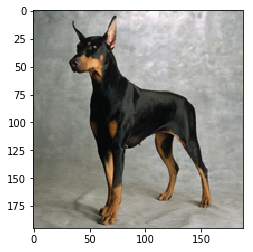

I guess your breed to be: ... German pinscher

**---------------------------------------------**



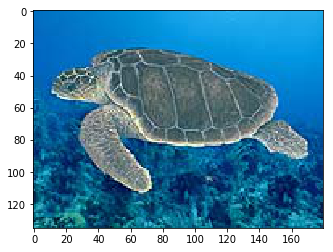

My apologies. Cannot detect a human or dog in this image. 
Come on, I am not General AI that can predict everything (at least not yet...!)

**---------------------------------------------**

What's up doggy?


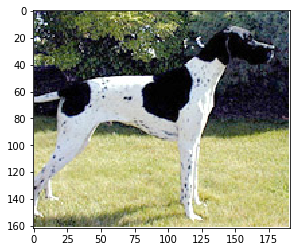

I guess your breed to be: ... Dalmatian

**---------------------------------------------**

You seem to be a human :)


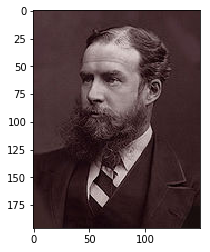

If you were a dog, you would look like a ... Chesapeake bay retriever

**---------------------------------------------**



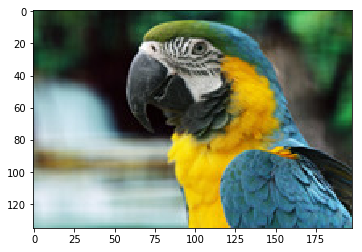

My apologies. Cannot detect a human or dog in this image. 
Come on, I am not General AI that can predict everything (at least not yet...!)

**---------------------------------------------**



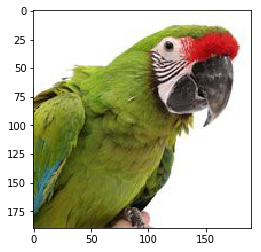

My apologies. Cannot detect a human or dog in this image. 
Come on, I am not General AI that can predict everything (at least not yet...!)

**---------------------------------------------**

What's up doggy?


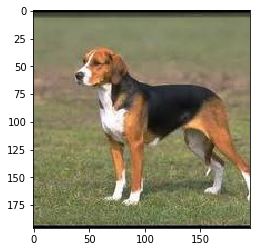

I guess your breed to be: ... American foxhound

**---------------------------------------------**

What's up doggy?


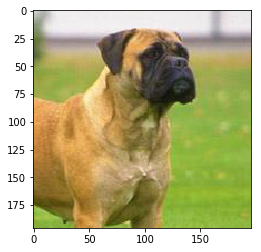

I guess your breed to be: ... Bullmastiff

**---------------------------------------------**



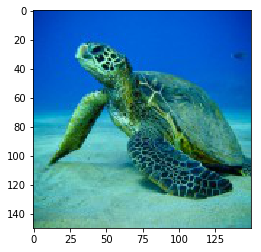

My apologies. Cannot detect a human or dog in this image. 
Come on, I am not General AI that can predict everything (at least not yet...!)

**---------------------------------------------**



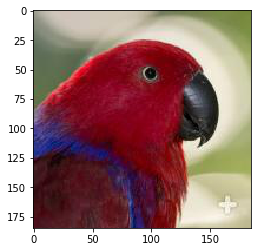

My apologies. Cannot detect a human or dog in this image. 
Come on, I am not General AI that can predict everything (at least not yet...!)

**---------------------------------------------**

You seem to be a human :)


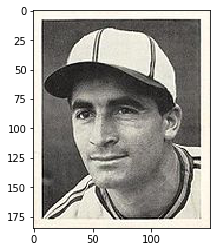

If you were a dog, you would look like a ... Pharaoh hound

**---------------------------------------------**

You seem to be a human :)


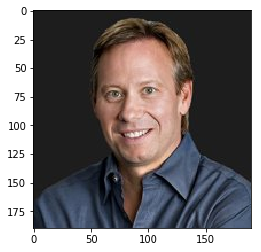

If you were a dog, you would look like a ... Pharaoh hound

**---------------------------------------------**



In [88]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below

# load filenames for human and dog images
test_files = np.array(glob("ilyas_test_set/*"))
print(test_files)
print('')

for file in test_files:
    run_app(file)

The End  
Ilyas Ustun  
August 18, 2020  
Chicago, IL  